In [ ]:
#Q6 : Python Questions

In [2]:
import pandas as pd

In [3]:
table_a = pd.read_csv(r'C:\Users\thaprabj\Documents\Table A.csv')

In [4]:
table_c = pd.read_csv(r'C:\Users\thaprabj\Documents\Table C.csv')

In [9]:
table_a. head()

,acct_yr_i,acct_wk_i,dc_id,Store_id,location_type,Package_type,dept_id,actual_qty,fcst_qty,Error
0,2024,1,551,4,General Merch,Full,9,977,1024,-5%
1,2024,2,551,4,General Merch,Full,53,2100,3438,-39%
2,2024,3,551,52,General Merch,Full,53,1306,975,34%
3,2024,3,551,52,General Merch,Full,64,901,924,-2%
4,2024,3,551,71,General Merch,Breakpack,83,556,254,119%


In [10]:
table_c.head()

,dept,dept_n,div_n,Pyramid
0,6,WOMENS LICENSE/GRAPHICS,YOUNG CONTEMPORARY,WOMENS/ACCESS
1,37,SKIN/BATH/FRAGRANCES,BEAUTY,BEAUTY/COSMETICS
2,90,SUNGLASSES,JEWELRY/ACCESS,WOMENS/ACCESS
3,117,SP-STATIONERY,STATIONERY,HOME
4,127,SP-MOVIES,MPD,MPD


In [49]:
# Q6.a. Find the forecast & actual that each DC processes in a week

dc_weekly_totals = table_a.groupby(['dc_id', 'acct_wk_i']).agg({
    'actual_qty': 'sum',
    'fcst_qty': 'sum' }).reset_index()

print (dc_weekly_totals)

    dc_id  acct_wk_i  actual_qty  fcst_qty
0     551          1       21273     22827
1     551          2       29665     34680
2     551          3       39142     46941
3     551          4       23728     20636
4     551          5       31702     42412
5     553          1       47523     48639
6     553          2       52805     58254
7     553          3       47907     59249
8     553          4       61823     62799
9     553          5       68517     68377
10    555          1       64720     60632
11    555          2       61431     68128
12    555          3       63977     75508
13    555          4       65962     68190
14    555          5       70818     68466
15    556          1       44415     45981
16    556          2       50938     49563
17    556          3       60884     59420
18    556          4       48802     55825
19    556          5       45707     41981
20    557          1       16104     24232
21    557          2       20498     20682
22    557  

In [50]:
# Q6.b. Calculate the share % of each DC with respect to all DCs in a week


weekly_totals_all_dcs = table_a.groupby('acct_wk_i').agg({
    'actual_qty': 'sum'
}).reset_index().rename(columns={
    'actual_qty': 'total_actual_qty'
})

dc_weekly_totals = dc_weekly_totals.reset_index()
if 'total_actual_qty' in dc_weekly_totals.columns:
    dc_weekly_totals = dc_weekly_totals.rename(columns={'total_actual_qty': 'dc_total_actual_qty'})

dc_weekly_totals = dc_weekly_totals.merge(weekly_totals_all_dcs, on='acct_wk_i')

dc_weekly_totals['actual_share_percent'] = (
    dc_weekly_totals['actual_qty'] / dc_weekly_totals['total_actual_qty']
) * 100

print(dc_weekly_totals[['dc_id', 'acct_wk_i', 'actual_share_percent']])


    dc_id  acct_wk_i  actual_share_percent
0     551          1              7.302956
1     553          1             16.314501
2     555          1             22.218179
3     556          1             15.247534
4     557          1              5.528454
5     558          1             11.747965
6     559          1              6.139866
7    3802          1             15.500544
8     551          2              8.929351
9     553          2             15.894636
10    555          2             18.491116
11    556          2             15.332657
12    557          2              6.170026
13    558          2              8.102788
14    559          2             13.273774
15   3802          2             13.805652
16    551          3             11.067285
17    553          3             13.545563
18    555          3             18.089308
19    556          3             17.214772
20    557          3              5.277474
21    558          3             10.421491
22    559  

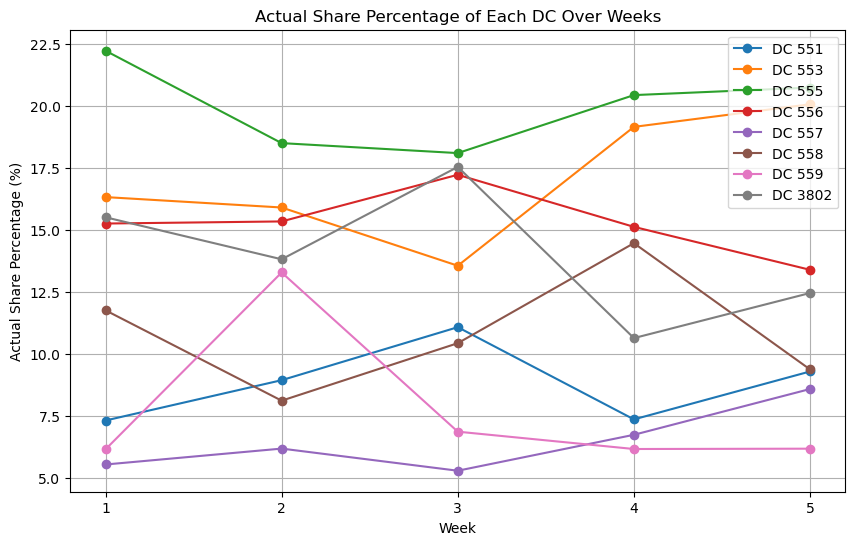

In [46]:
#Q6.c. Plot a trend chart of this share for each DC

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for dc in dc_weekly_totals['dc_id'].unique():
    dc_data = dc_weekly_totals[dc_weekly_totals['dc_id'] == dc]
    plt.plot(
        dc_data['acct_wk_i'],
        dc_data['actual_share_percent'],
        marker='o',
        label=f'DC {dc}'
    )

plt.title('Actual Share Percentage of Each DC Over Weeks')
plt.xlabel('Week')
plt.ylabel('Actual Share Percentage (%)')
plt.xticks(dc_weekly_totals['acct_wk_i'].unique())
plt.legend()
plt.grid(True)